<a href="https://colab.research.google.com/github/janielledagondon/avocado-hass-2021/blob/main/avocado_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Average Prices of Avocado in USA**

**Origin: Kaggle (https://www.kaggle.com/datasets/neuromusic/avocado-prices)**

### **Context**

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

### **Content**

The data represents weekly 2021 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2015, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

- date: The date of the observation
- average_price: The average price of a single avocado
- total_volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 (Small/Medium Hass Avocado (~3-5oz avocado)) sold
- 4225: Total number of avocados with PLU 4225 (Large Hass Avocado (~8-10oz avocado)) sold
- 4770: Total number of avocados with PLU 4770 (Extra Large Hass Avocado (~10-15oz avocado)) sold
- total_bags: Total number of Bags sold
- small_bags: Total number of Small Bags sold
- large_bags: Total number of Large Bags sold
- xlarge_bags: Total number of XLarge Bags sold
- type: conventional or organic
- year: The year
- geography: The city or region of the observation
- bulk_gtin: Global Trade Item Number

### **Problem Statement**

We will cover basic EDA.
And we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).
The variables of the dataset are the following:

Categorical: geography, type

Date: date

Numerical: total_volume, 4046, 4225, 4770, total_bags, small_bags, large_bags, xlarge_bags, year, bulk_gtin

Target: average_price

### **Questions to be answered in our EDA (Exploratory Data Analysis)**

- What year did the prices peaked for our hass avocados?
- What is the % for each of the avocado types in the dataset?
- When can we see an increase or decline in the average price in terms of month?
- When can we see an increase or decline in the average price in terms of day?
- Which avocado type is more expensive?
- What are the top 3 city/region where the average price is very high?
- In which year and in what city/region was the average price the highest for both conventional and organic avocado types?
- What does the distribution plot of average price look like and what type of distribution is it?
- How correlated are the dataset features with each other?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/janielledagondon/avocado-hass-2021/main/avocado-updated-2021.csv')
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,bulk_gtin
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,NaN
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,NaN
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,NaN


In [4]:
df.drop('bulk_gtin', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33477 entries, 0 to 33476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33477 non-null  object 
 1   average_price  33477 non-null  float64
 2   total_volume   33477 non-null  float64
 3   4046           33477 non-null  float64
 4   4225           33477 non-null  float64
 5   4770           33477 non-null  float64
 6   total_bags     33477 non-null  float64
 7   small_bags     33477 non-null  float64
 8   large_bags     33477 non-null  float64
 9   xlarge_bags    33477 non-null  float64
 10  type           33477 non-null  object 
 11  year           33477 non-null  int64  
 12  geography      33477 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
df.shape

(33477, 13)

In [6]:
df = df.replace('/', '', regex=True)
df = df.replace(' ', '', regex=True)
df.geography.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFt.Worth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFt.Lauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'St.Louis', 'Syracuse',
       'Tampa', 'TotalU.S.', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
df.duplicated().any()

False

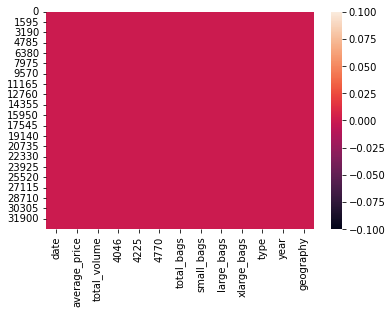

In [8]:
sns.heatmap(df.isnull())

No missing values (33477 complete data) and 13 columns. Now let's do some Feature Engineering on the date Feature so we can be able to use the day and the month columns in building our model later.

In [9]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda x:x.month) # basically takes each row of df as an input, x
df['day']=df['date'].apply(lambda x:x.day) # basically takes each row of df as an input, x
df.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
4046                    float64
4225                    float64
4770                    float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
geography                object
month                     int64
day                       int64
dtype: object

In [10]:
print(df['month'].unique(), "\n--------------------------------------")
print(df['day'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
--------------------------------------
[ 4 11 18 25  1  8 15 22 29  5 12 19 26  3 10 17 24 31  7 14 21 28  2  9
 16 23 30  6 13 20 27]


Newly added month and day columns to our dataset.

## **Data Visualizations**

##### **What year did the prices peaked for our hass avocados?**

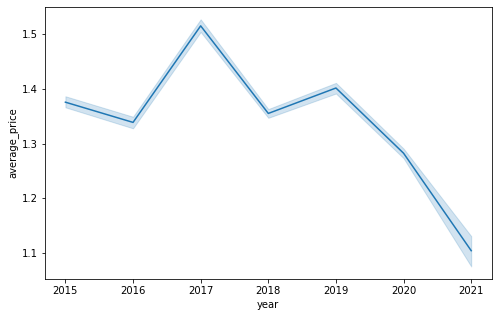

In [11]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='average_price', data=df)

The plot shows the average price of avocado according to the year and there was an increase of average_price around 2016 which eventually reached its peak on 2017.

In [12]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

So there are 2 types of avocado: conventional and organic.

##### **What is the % for each of the avocado types in our dataset?**

([<matplotlib.patches.Wedge at 0x7f0e0e7b88d0>,
 [Text(-0.00015489610638988024, 1.09999998909418, 'conventional'),
  Text(0.00015499909582119488, -1.0999999890796728, 'organic')],
 [Text(-8.448878530357104e-05, 0.5999999940513709, '50.004%'),
  Text(8.454496135701538e-05, -0.5999999940434578, '49.996%')])

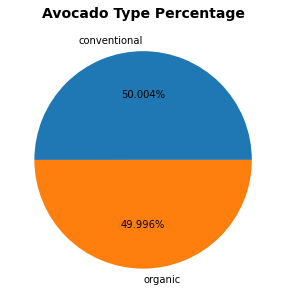

In [13]:
order = df['type'].value_counts().index

plt.figure(figsize=(10, 5))
plt.title('Avocado Type Percentage', fontweight='bold', fontsize=14)
plt.pie(df['type'].value_counts(), labels=order, autopct='%0.3f%%')

In the whole dataset, there are 50% conventional avocado types and 50% organic avocado types.

2017    5722
2016    5616
2019    5616
2015    5615
2018    5292
2020    5184
2021     432
Name: year, dtype: int64

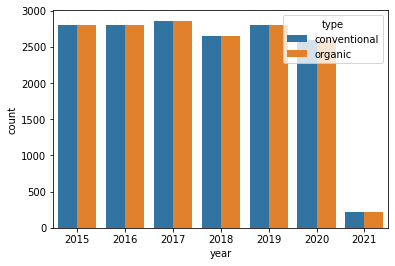

In [14]:
sns.countplot(x='year',data=df,hue='type');
df.year.value_counts()

There are less than 500 avocados for both types that was observed and added into this dataset during the year 2021.

The year with the highest amount of both avocado types was on the year 2017.

##### **When can we see an increase or decline in the average price in terms of month?**

Text(0.5, 1.0, 'Average Price Per Month')

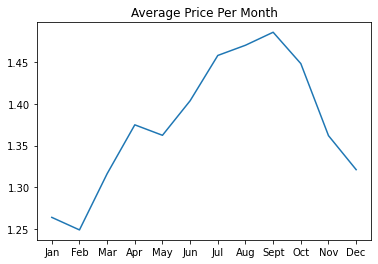

In [15]:
by_month = df.groupby("month").mean()
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"], by_month['average_price'])
plt.title('Average Price Per Month')

We can see from the above graph of average avocado price each month that the price climbs for a time in February to April, then lowers in May, and then rises again in June. This increase reaches its peak in September, after which it begins to decline.

##### **When can we see an increase or decline in the average price in terms of day?**

Text(0.5, 1.0, 'Average Price Per Day')

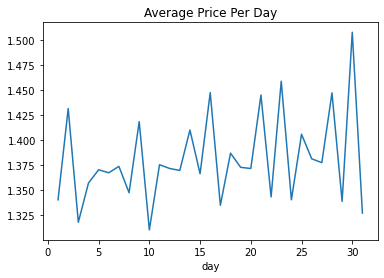

In [16]:
by_day = df.groupby("day").mean()
by_day['average_price'].plot()
plt.title('Average Price Per Day')

The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.

##### **Which avocado type is more expensive?**

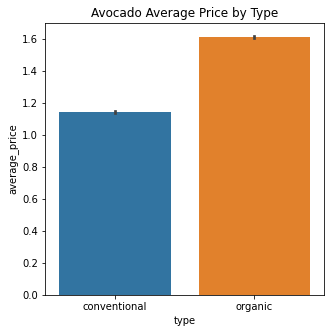

In [17]:
plt.figure(figsize=(5, 5))
plt.title("Avocado Average Price by Type")
sns.barplot(x="type", y="average_price", data=df)
plt.show()

Organic avocado type is much expensive than the conventional ones which would be obvious since their cultivation (higher costs of growing and harvesting organic produce) is more expensive. But it is likely that the price of avocado depends not only on the avocado type. Let's look at average price according to geography (city or region)

##### **What are the top 3 city/region where the average price is very high?**

Text(0.5, 1.0, 'Average Price According to City/Region')

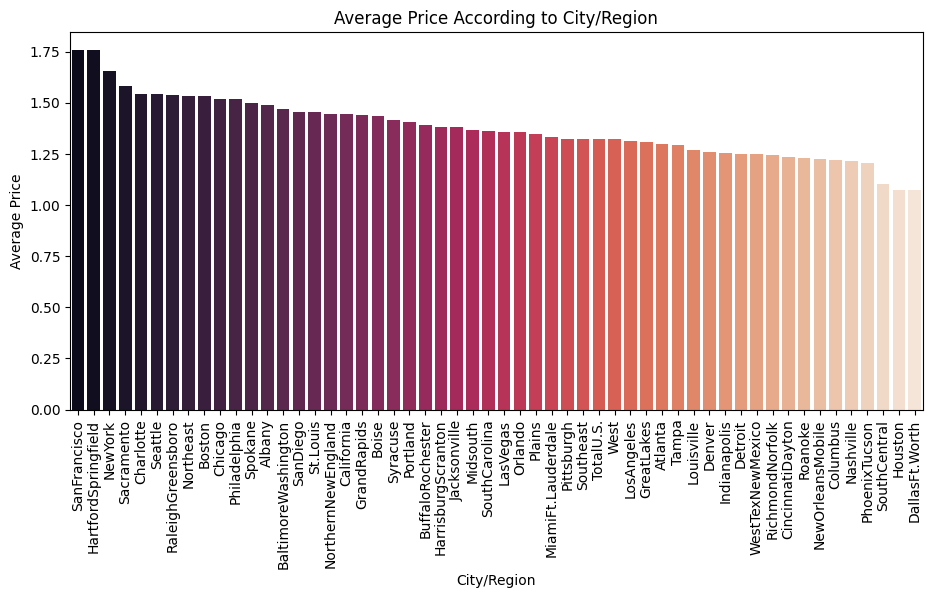

In [18]:
by_geo=df.groupby('geography').mean()
by_geo.sort_values(by=['average_price'], ascending=False, inplace=True)
plt.figure(figsize=(11,5),dpi=100)
sns.barplot(x = by_geo.index, y=by_geo["average_price"], data = by_geo, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('City/Region')
plt.ylabel('Average Price')
plt.title('Average Price According to City/Region')

The barplot shows the average price of avocado at various regions in a ascending order. Clearly, San Francisco, Hartford Springfield, and New York are the locations with the highest avocado prices. But this graph is for the 2 types of avocado. Let's visualize average_price according to each of the avocado types: conventional and organic.

##### **In which year and in what city/region was the average price the highest for both conventional and organic avocado types?**

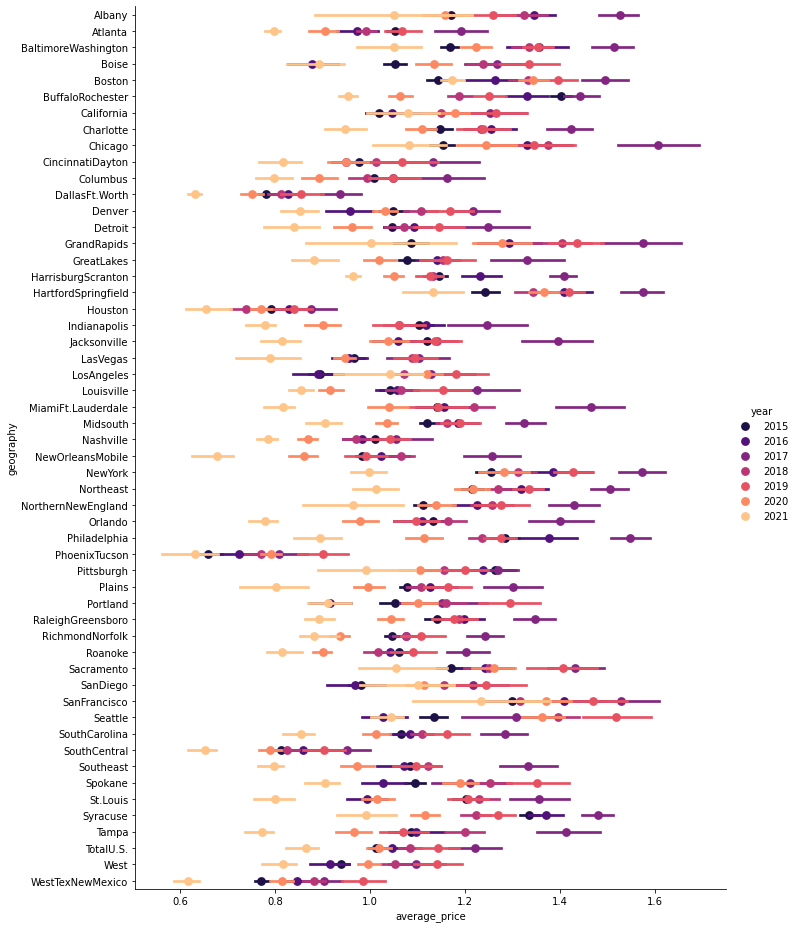

In [19]:
mask = df['type'] == 'conventional'
sns.factorplot('average_price','geography',data=df[mask],hue='year',size=13,aspect=0.8,palette='magma',join=False)

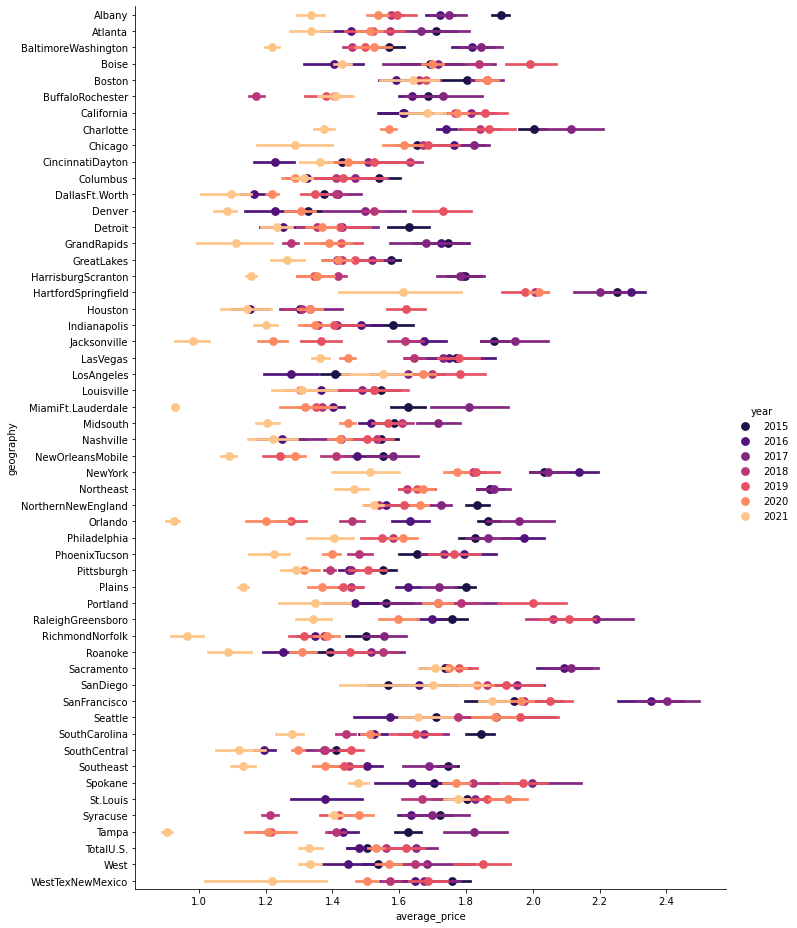

In [20]:
mask = df['type'] == 'organic'
sns.factorplot('average_price','geography',data=df[mask],hue='year',size=13,aspect=0.8,palette='magma',join=False)

##### **What does the distribution plot of average price look like and what type of distribution is it?**

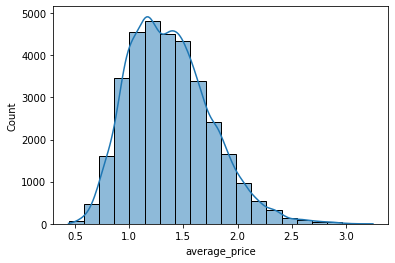

In [21]:
sns.histplot(data=df, x="average_price", bins=20, kde=True)

The above histogram for the average price of avocado suggests that its distribution is positively skewed, which means the mean is greater than the median as the data is more towards the lower side and the mean average of all the values, whereas the median is the middle value of the data.

Average price distribution shows that for most cases price of avocado is between 1.1, 1.4.

##### **How correlated are the dataset features with each other?**

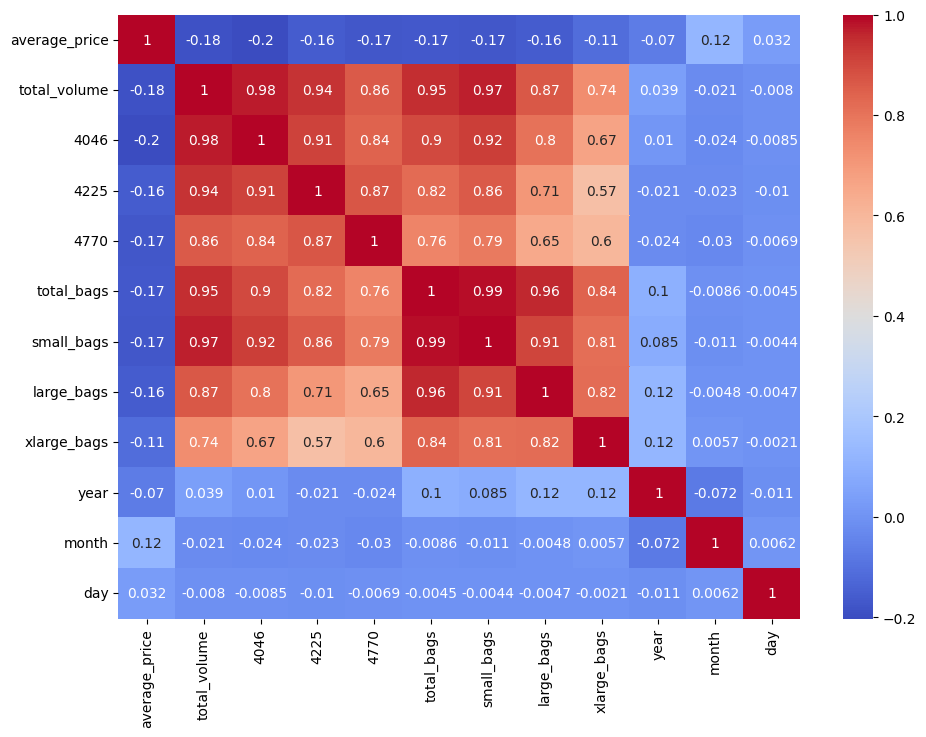

In [22]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(11,8),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not correlated with the average price column, instead most of them are correlated with each other.

## **Detecting Outliers**

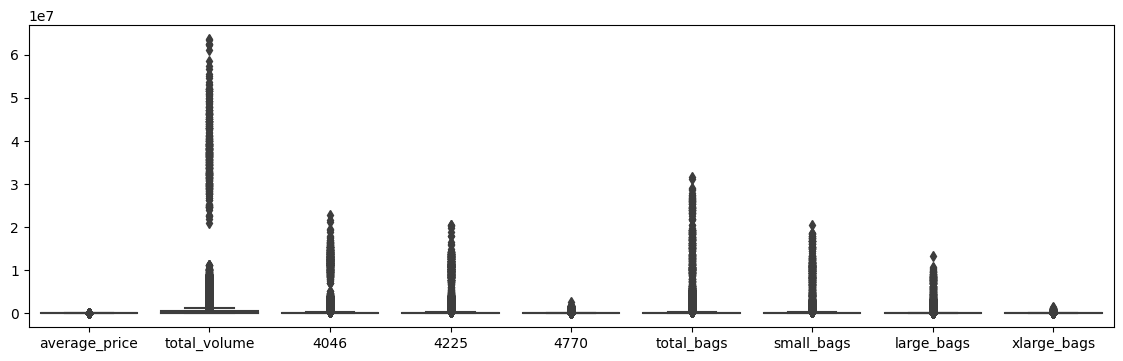

In [23]:
plt.figure(figsize=(14,4),dpi=100)
sns.boxplot(data = df[[
 'average_price',
 'total_volume',
 '4046',
 '4225',
 '4770',
 'total_bags',
 'small_bags',
 'large_bags',
 'xlarge_bags']])

Clearly the boxplot indicates that all the variables contains outliers. But instead of taking care of the outliers, we won't do anything since we don't have any good reason to remove them (for now)

In [24]:
df.drop("date",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33477 entries, 0 to 33476
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   average_price  33477 non-null  float64
 1   total_volume   33477 non-null  float64
 2   4046           33477 non-null  float64
 3   4225           33477 non-null  float64
 4   4770           33477 non-null  float64
 5   total_bags     33477 non-null  float64
 6   small_bags     33477 non-null  float64
 7   large_bags     33477 non-null  float64
 8   xlarge_bags    33477 non-null  float64
 9   type           33477 non-null  object 
 10  year           33477 non-null  int64  
 11  geography      33477 non-null  object 
 12  month          33477 non-null  int64  
 13  day            33477 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 3.6+ MB


## **Pre-processing**

We will use get_dummies() ) which helps us to easily one-hot encode any categorical data that we have which is "year", "geography", "month", and "day". We then apply label encoding in variable "type".

*One hot encoding creates equal number of columns, with 1's and 0's, as the number of categories in a categorical variable a column for a specific category contains 1's where the category is present and 0's elsewhere.*

As for label encoding it asssigns numerical value to the categories of a categorical variable in their alphabetical order, the indexing starts with 0.

In [25]:
dummies = pd.get_dummies(df[['year', 'geography', 'month', 'day']], drop_first=True) # drop_first=True to remove redundant columns
dummies

,year,month,day,geography_Atlanta,geography_BaltimoreWashington,geography_Boise,geography_Boston,geography_BuffaloRochester,geography_California,geography_Charlotte,...,geography_SouthCarolina,geography_SouthCentral,geography_Southeast,geography_Spokane,geography_St.Louis,geography_Syracuse,geography_Tampa,geography_TotalU.S.,geography_West,geography_WestTexNewMexico
0,2015,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,1,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33472,2021,1,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33473,2021,1,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33474,2021,1,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33475,2021,1,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
df['type']= label_encoder.fit_transform(df['type'])

Now its time that we fit multiple linear regression and random forest regression onto our data.

## **Model Fitting**

80% for training set and 20% for testing set.

In [27]:
from sklearn.model_selection import train_test_split

X = pd.concat([df[['total_volume', '4046', '4225', '4770', 'total_bags','small_bags', 'large_bags', 'xlarge_bags', 'type']], dummies], axis=1)
y = df['average_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X.tail()

,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,...,geography_SouthCarolina,geography_SouthCentral,geography_Southeast,geography_Spokane,geography_St.Louis,geography_Syracuse,geography_Tampa,geography_TotalU.S.,geography_West,geography_WestTexNewMexico
33472,2521304.00,102266.00,155918.00,6069.00,1535483.00,1105120.00,404877.00,25486.00,1,2021,...,0,0,0,0,0,0,0,1,0,0
33473,9035538.27,1721631.76,1173203.94,23811.42,1678243.81,1365205.00,302218.21,10820.60,0,2021,...,0,0,0,0,0,0,0,0,1,0
33474,442117.00,17900.00,36429.00,1314.00,170847.00,72387.00,98460.00,0.00,1,2021,...,0,0,0,0,0,0,0,0,1,0
33475,1200129.95,346320.08,108086.03,9884.54,472566.68,302113.32,170440.03,13.33,0,2021,...,0,0,0,0,0,0,0,0,0,1
33476,28258.00,750.00,689.00,3163.00,12845.00,9943.00,2902.00,0.00,1,2021,...,0,0,0,0,0,0,0,0,0,1


Standardizing our X_train and X_test using Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

columns = ['total_volume', '4046', '4225', '4770','total_bags', 'small_bags', 'large_bags', 'xlarge_bags']
scaler = StandardScaler()
scaler.fit(X_train[columns])
X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [30]:
X_train.columns

Index(['total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags', 'type', 'year', 'month', 'day',
       'geography_Atlanta', 'geography_BaltimoreWashington', 'geography_Boise',
       'geography_Boston', 'geography_BuffaloRochester',
       'geography_California', 'geography_Charlotte', 'geography_Chicago',
       'geography_CincinnatiDayton', 'geography_Columbus',
       'geography_DallasFt.Worth', 'geography_Denver', 'geography_Detroit',
       'geography_GrandRapids', 'geography_GreatLakes',
       'geography_HarrisburgScranton', 'geography_HartfordSpringfield',
       'geography_Houston', 'geography_Indianapolis', 'geography_Jacksonville',
       'geography_LasVegas', 'geography_LosAngeles', 'geography_Louisville',
       'geography_MiamiFt.Lauderdale', 'geography_Midsouth',
       'geography_Nashville', 'geography_NewOrleansMobile',
       'geography_NewYork', 'geography_Northeast',
       'geography_NorthernNewEngland', 'geography_Orl

The regg_results() defined below calculates and prints the following features of a model using explained_variance, r2, MAE, MSE, RMSE. It accepts the original (orig) and predicted (pred) values as its arguments.

In [31]:
import sklearn.metrics as metrics

def regg_results(orig, pred):
    evar = metrics.explained_variance_score(orig, pred)
    mae = metrics.mean_absolute_error(orig, pred)
    mse = metrics.mean_squared_error(orig, pred)
    r2 = metrics.r2_score(orig, pred)

    print('Explained_variance: ', round(evar, 3))    
    print('R2: ', round(r2, 3))
    print('MAE: ', round(mae, 3))
    print('MSE: ', round(mse, 3))
    print('RMSE: ', round(np.sqrt(mse), 3))

Below is a function to find the accuracy of each model on the basis of cross validation.

In [32]:
from sklearn.model_selection import cross_val_score

# cross_val_score:
# evaluates the score using cross validation by randomly splitting the training sets 
# into distinct subsets called folds, then it trains and evaluated the model on the folds, 
# picking a different fold for evaluation every time and training on the other folds.

def accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### **Fitting Multiple Linear Regression Model**

In [33]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
regg_results(y_test,y_pred)
accuracy(lr)

Explained_variance:  0.569
R2:  0.569
MAE:  0.188
MSE:  0.062
RMSE:  0.248
Accuracy: 55.18 %
Standard Deviation: 1.09 %


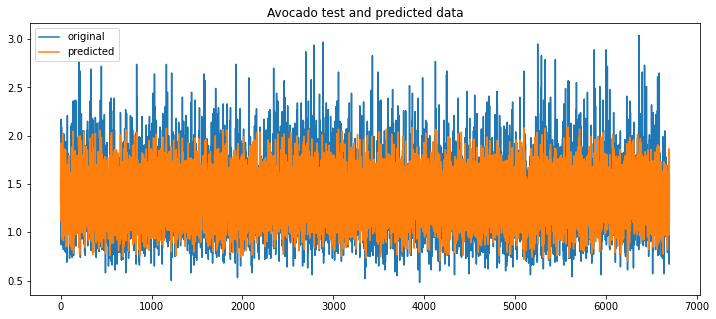

In [34]:
x_ax = range(len(y_test))

plt.figure(figsize=(12, 5))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Avocado test and predicted data")
plt.legend()
plt.show()

### **Fitting Random Forest Regression Model**

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
regg_results(y_test,y_pred_rf)
accuracy(rf)

Explained_variance:  0.903
R2:  0.903
MAE:  0.084
MSE:  0.014
RMSE:  0.118
Accuracy: 89.62 %
Standard Deviation: 0.39 %


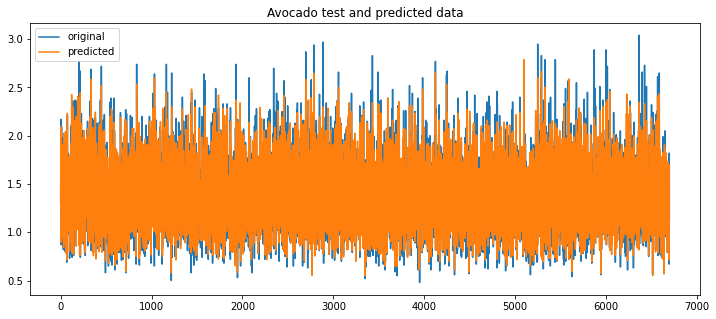

In [36]:
x_ax = range(len(y_test))

plt.figure(figsize=(12, 5))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_rf, label="predicted")
plt.title("Avocado test and predicted data")
plt.legend()
plt.show()